In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], [8.9], [5.2], [8.59], [2.1], [8], [10], [4.5], [6], [4]], dtype=np.float32)
y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], [2.6], [1.96], [3.53], [1.76], [3.2], [3.5], [1.6], [2.5], [2.2]], dtype=np.float32)

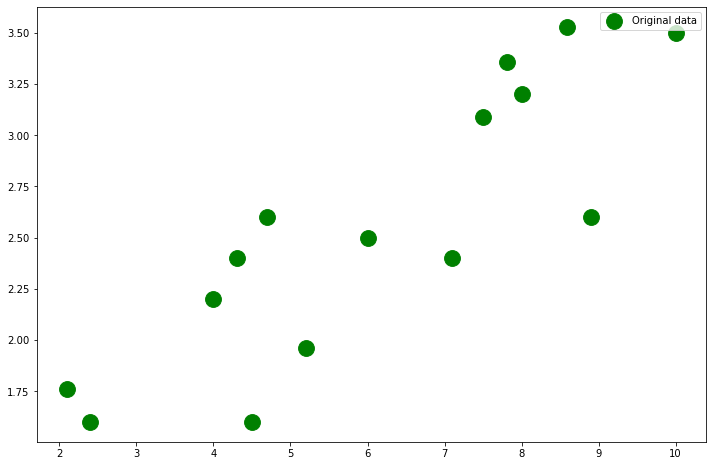

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.legend()
plt.show()

In [32]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [33]:
input_size = 1
hidden_size = 1
output_size = 1

In [34]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True) #weights that correspond to connection between input and hidden layer
w1.shape

torch.Size([1, 1])

In [35]:
w2 = torch.rand(hidden_size, output_size, requires_grad=True) #weights that correspond to connection between hidden and output layer
w2.shape

torch.Size([1, 1])

In [36]:
learning_rate = 1e-6

In [37]:
for iter in range(1, 3000):
    y_pred = X_train.mm(w1).mm(w2) #Performs a forward pass through the neural network constructed using a single linear neuron with no activation function
                                   #Where mm is multiplication
    loss = (y_pred - Y_train).pow(2).sum() #This is the mean square error loss function for linear regression

    if iter % 50 == 0:
        print(iter, loss.item()) #This prints out loss to help us see that we are converging towards a result
    
    loss.backward() #Calculates gradient by back pass
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 6.354076862335205
100 6.128082752227783
150 5.9234938621521
200 5.7384514808654785
250 5.571237087249756
300 5.420252799987793
350 5.284031391143799
400 5.1612229347229
450 5.050579071044922
500 4.950974941253662
550 4.861359119415283
600 4.780783176422119
650 4.708375453948975
700 4.643346309661865
750 4.5849761962890625
800 4.5326104164123535
850 4.485651969909668
900 4.443561553955078
950 4.405850887298584
1000 4.372076988220215
1050 4.34184455871582
1100 4.314788818359375
1150 4.290586948394775
1200 4.268944263458252
1250 4.249596118927002
1300 4.232304096221924
1350 4.216854572296143
1400 4.203055381774902
1450 4.190731525421143
1500 4.17972993850708
1550 4.169909477233887
1600 4.1611480712890625
1650 4.153331279754639
1700 4.146357536315918
1750 4.140137672424316
1800 4.134591102600098
1850 4.1296467781066895
1900 4.125239849090576
1950 4.121310710906982
2000 4.117809772491455
2050 4.114691257476807
2100 4.111910820007324
2150 4.109434604644775
2200 4.107230186462402
2250 4.10

In [38]:
print('w1: ', w1)
print('w2: ', w2)

w1:tensor([[0.4719]], requires_grad=True)
w2:  tensor([[0.8360]], requires_grad=True)


In [39]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [40]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8544],
        [0.9469],
        [2.9592],
        [2.8014],
        [1.6966],
        [3.0839],
        [3.5116],
        [2.0517],
        [3.3893],
        [0.8286],
        [3.1565],
        [3.9456],
        [1.7755],
        [2.3673],
        [1.5782]], grad_fn=<MmBackward>)

In [41]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8544232 ],
       [0.9469395 ],
       [2.9591858 ],
       [2.8013628 ],
       [1.6966    ],
       [3.0838664 ],
       [3.511567  ],
       [2.0517023 ],
       [3.3892546 ],
       [0.82857203],
       [3.156465  ],
       [3.9455814 ],
       [1.7755116 ],
       [2.3673487 ],
       [1.5782325 ]], dtype=float32)

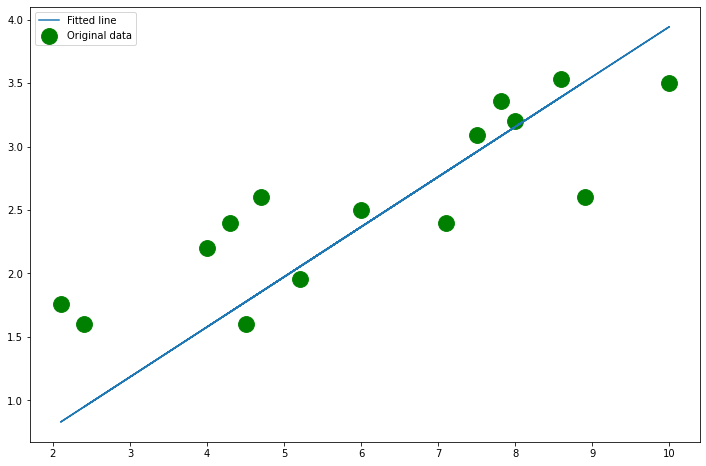

In [42]:
plt.figure(figsize=(12, 8))
plt.scatter(x_train, y_train, label='Original data', s=250, c='g')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()